## Testing: &thinsp; featues of dataset

In [2]:
import xarray as xr
import numpy as np

import skimage.measure as skm
import matplotlib.pyplot as plt
import cartopy

import os
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
def plot_scene(scene, cmap='Reds', title='', vmin=None, vmax=None, fig_width=20 ,fig_height=10):
    projection = cartopy.crs.PlateCarree(central_longitude=180)
    lat = scene.lat
    lon = scene.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(fig_width, fig_height))
    scene.plot(transform=cartopy.crs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())
    ax.set_title(title)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [4]:
def plot_timeseries(y, variable_name='', series_type ='', title='', xmin = None, ymin = None):
    plt.figure(figsize=(25,5))
    plt.plot(y)
    plt.axhline(y=y.mean(dim='time'), color='k')
    plt.title(title)
    plt.ylabel(variable_name)
    plt.xlabel(series_type)
    plt.ylim([xmin,ymin])

In [5]:
def calc_sMean(var):
    aWeights = np.cos(np.deg2rad(var.lat))
    return var.weighted(aWeights).mean(dim=('lat','lon'))

In [6]:
def save_file(dataset, folder, filename):
    os.makedirs(folder, exist_ok=True)
    path = folder + '/' + filename

    if os.path.exists(path):
        os.remove(path)    
    
    dataset.to_netcdf(path)

In [11]:
model = 'GFDL-CM3'
# model = 'IPSL-CM5A-MR'
experiments =[
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    'GPCP'
    ]
obs = observations[0]

variables = [
    'precip',
    # 'tas',
    # 'hus',
    # 'hur',
    # 'wap',
    # 'clouds',
    # 'pw',
    # 'wap500',
    # 'clMax',
    # 'rome',
    # 'numberIndex',
    # 'prPercentiles'
]
variable = variables[0]


# folder = home + '/Documents/data/obs/' + obs
# fileName =  obs + '_' + variable + '.nc'

folder = home + '/Documents/data/CMIP5/ds/' + model
fileName =  model + '_' + variable + '_'+ experiment+'.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/27)
    title:                  NOAA GFDL GFDL-CM3, historical (run 1) experiment...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table day (31 Jan 2011)
    ...                     ...
    parent_experiment_id:   piControl
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

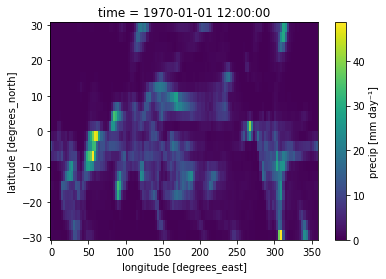

In [12]:
ds['precip'].isel(time=-0).plot()

In [15]:
# var = ds['precip']
# var

<xarray.DataArray 'precip' (time: 8731, lat: 22, lon: 128)>
[24586496 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2021-12-31
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean
    coordinates:    time latitude longitude

In [27]:
ds_n = ds.sel(time = slice('1998','2021'))
ds_n.attrs['units'] = 'km\u00b2'
ds_n

<xarray.Dataset>
Dimensions:  (time: 8731)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2021-12-31
Data variables:
    rome     (time) float64 3.404e+05 3.284e+05 ... 2.343e+05 2.274e+05
    rome_n   (time) float64 1.756e+06 1.749e+06 ... 9.344e+05 8.215e+05
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km²

In [28]:
folder_save = home + '/Documents/data/obs/' + obs
fileName =  obs + '_' + variable + '.nc'

# ds_n =  xr.Dataset(
#     data_vars ={'rome': var_n},
#     attrs = ds.attrs)


save_file(ds_n, folder_save, fileName)